# Explore here

In [ ]:
import os
from sqlalchemy import create_engine
import pandas as pd
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

# 1) Connect to the database here using the SQLAlchemy's create_engine function

# 2) Execute the SQL sentences to create your tables using the SQLAlchemy's execute function

# 3) Execute the SQL sentences to insert your data using the SQLAlchemy's execute function

# 4) Use pandas to print one of the tables as dataframes using read_sql function

In [1]:
import os
from sqlalchemy import create_engine
import pandas as pd
from dotenv import load_dotenv
import spotipy
from spotipy import SpotifyClientCredentials

load_dotenv()

True

In [6]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


client_id = "8c425a2e376846f0b3d53d8d4fa9a9a0"
client_secret = "97aac6d4b18341d1b81aacb9f1fe04cd"
metallica_uri = 'spotify:artist:2ye2Wgw4gimLv2eAKyk1NB'

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id,client_secret=client_secret))
results = spotify.artist_top_tracks(metallica_uri)

for track in results['tracks']:
    print('track    : ' + track['name'])
    #print('audio    : ' + track['preview_url'])
    #print('cover art: ' + track['album']['images'][0]['url'])
    print('duration:' + str(track['duration_ms']))
    print('popularity:' + str(track['popularity']))

track    : Enter Sandman (Remastered)
duration:331560
popularity:78
track    : Nothing Else Matters (Remastered)
duration:388733
popularity:73
track    : Master of Puppets (Remastered)
duration:515386
popularity:74
track    : For Whom The Bell Tolls (Remastered)
duration:309973
popularity:73
track    : One (Remastered)
duration:446145
popularity:72
track    : The Unforgiven (Remastered)
duration:387160
popularity:68
track    : Whiskey In The Jar
duration:304893
popularity:67
track    : Sad But True (Remastered)
duration:324600
popularity:69
track    : Fuel
duration:269733
popularity:67
track    : Fade To Black (Remastered)
duration:417226
popularity:66


In [7]:
names=[track['name'] for track in results['tracks']]
durations=[round((track['duration_ms']/1000)/60,2) for track in results['tracks']]
populars=[track['popularity'] for track in results['tracks']]

In [8]:
import pandas as pd
df=pd.DataFrame({"Names":names,"Durations":durations,"Popularity":populars})
df

,Names,Durations,Popularity
0,Enter Sandman (Remastered),5.53,78
1,Nothing Else Matters (Remastered),6.48,73
2,Master of Puppets (Remastered),8.59,74
3,For Whom The Bell Tolls (Remastered),5.17,73
4,One (Remastered),7.44,72
5,The Unforgiven (Remastered),6.45,68
6,Whiskey In The Jar,5.08,67
7,Sad But True (Remastered),5.41,69
8,Fuel,4.50,67
9,Fade To Black (Remastered),6.95,66


In [9]:
top3_df=df.sort_values(by='Popularity',ascending=True).head(3)
top3_df

,Names,Durations,Popularity
9,Fade To Black (Remastered),6.95,66
6,Whiskey In The Jar,5.08,67
8,Fuel,4.50,67


In [10]:
import matplotlib.pyplot as plt

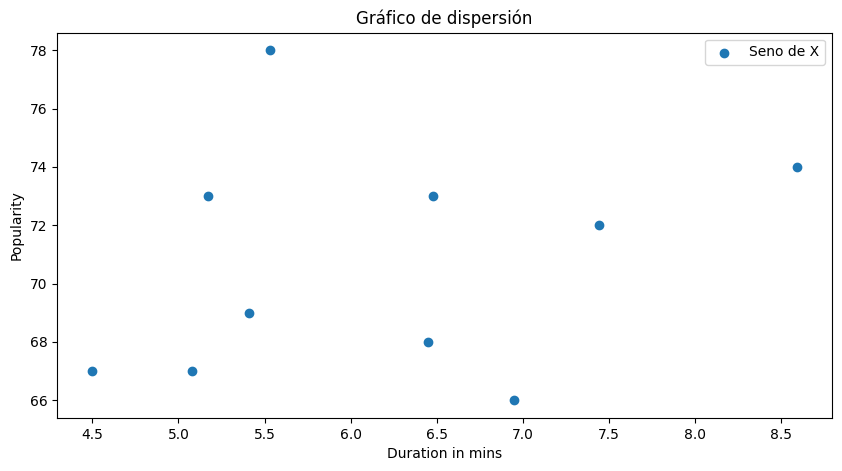

In [11]:
x=df['Durations']
y=df['Popularity']
plt.figure(figsize = (10, 5))

plt.scatter(x, y, label = "Seno de X")

plt.title("Gráfico de dispersión")
plt.xlabel("Duration in mins")
plt.ylabel("Popularity")
plt.legend()
plt.show()

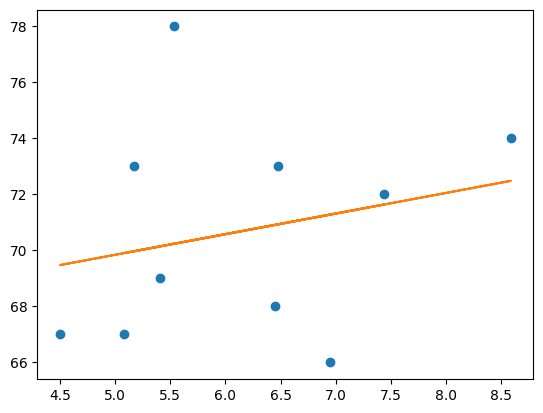

In [12]:
import numpy as np
#names=np.array(names)
durations=np.array(durations)
populars=np.array(populars)
#create basic scatterplot
plt.plot(durations, populars, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(durations, populars, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)

In [13]:
df.cov()

,Durations,Popularity
Durations,1.579489,1.162222
Popularity,1.162222,15.122222


In [14]:
df.corr(method='pearson')

,Durations,Popularity
Durations,1.000000,0.237806
Popularity,0.237806,1.000000


A la vista de los resultados obtenidos podemos afirmar que, aunque de manera muy débil, existe una correlación positiva entre la duración de las canciones y su popularidad